In [1]:
#Bike Buyers Prediction

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

In [5]:
dfa = pd.read_csv("c:data\\bike_buyers.csv")
print(dfa.shape)
dfa.head()

(1000, 13)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [7]:
print(dfa['Gender'].value_counts())

Gender
Male      500
Female    489
Name: count, dtype: int64


In [9]:
print(dfa['Education'].value_counts())

Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64


In [11]:
print(dfa['Occupation'].value_counts())

Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64


In [13]:
print(dfa["Marital Status"].value_counts())

Marital Status
Married    535
Single     458
Name: count, dtype: int64


In [15]:
print(dfa["Region"].value_counts())


Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64


In [17]:
print(dfa["Purchased Bike"].value_counts())

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


In [19]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [21]:
numeric_attribute = dfa.select_dtypes(include = ['int64', 'float64'])

<Axes: >

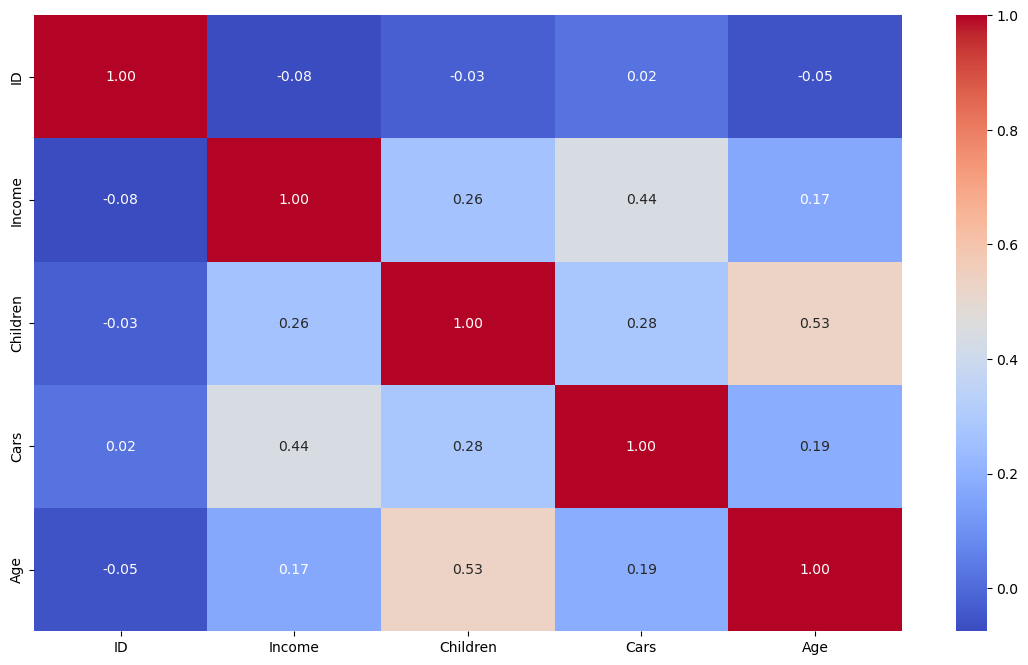

In [23]:
plt.figure(figsize=(14, 8))
sb.heatmap(numeric_attribute.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [27]:
## Finding out correlation of each attribute with each other
cor_data = numeric_attribute.corr().round(4)
for k in numeric_attribute:
    print(f"\n-------{k}:")
    print(cor_data[k].sort_values(ascending=False))


-------ID:
ID          1.0000
Cars        0.0221
Children   -0.0287
Age        -0.0542
Income     -0.0751
Name: ID, dtype: float64

-------Income:
Income      1.0000
Cars        0.4400
Children    0.2611
Age         0.1708
ID         -0.0751
Name: Income, dtype: float64

-------Children:
Children    1.0000
Age         0.5317
Cars        0.2802
Income      0.2611
ID         -0.0287
Name: Children, dtype: float64

-------Cars:
Cars        1.0000
Income      0.4400
Children    0.2802
Age         0.1864
ID          0.0221
Name: Cars, dtype: float64

-------Age:
Age         1.0000
Children    0.5317
Cars        0.1864
Income      0.1708
ID         -0.0542
Name: Age, dtype: float64


In [29]:
#There is no multicollinearity

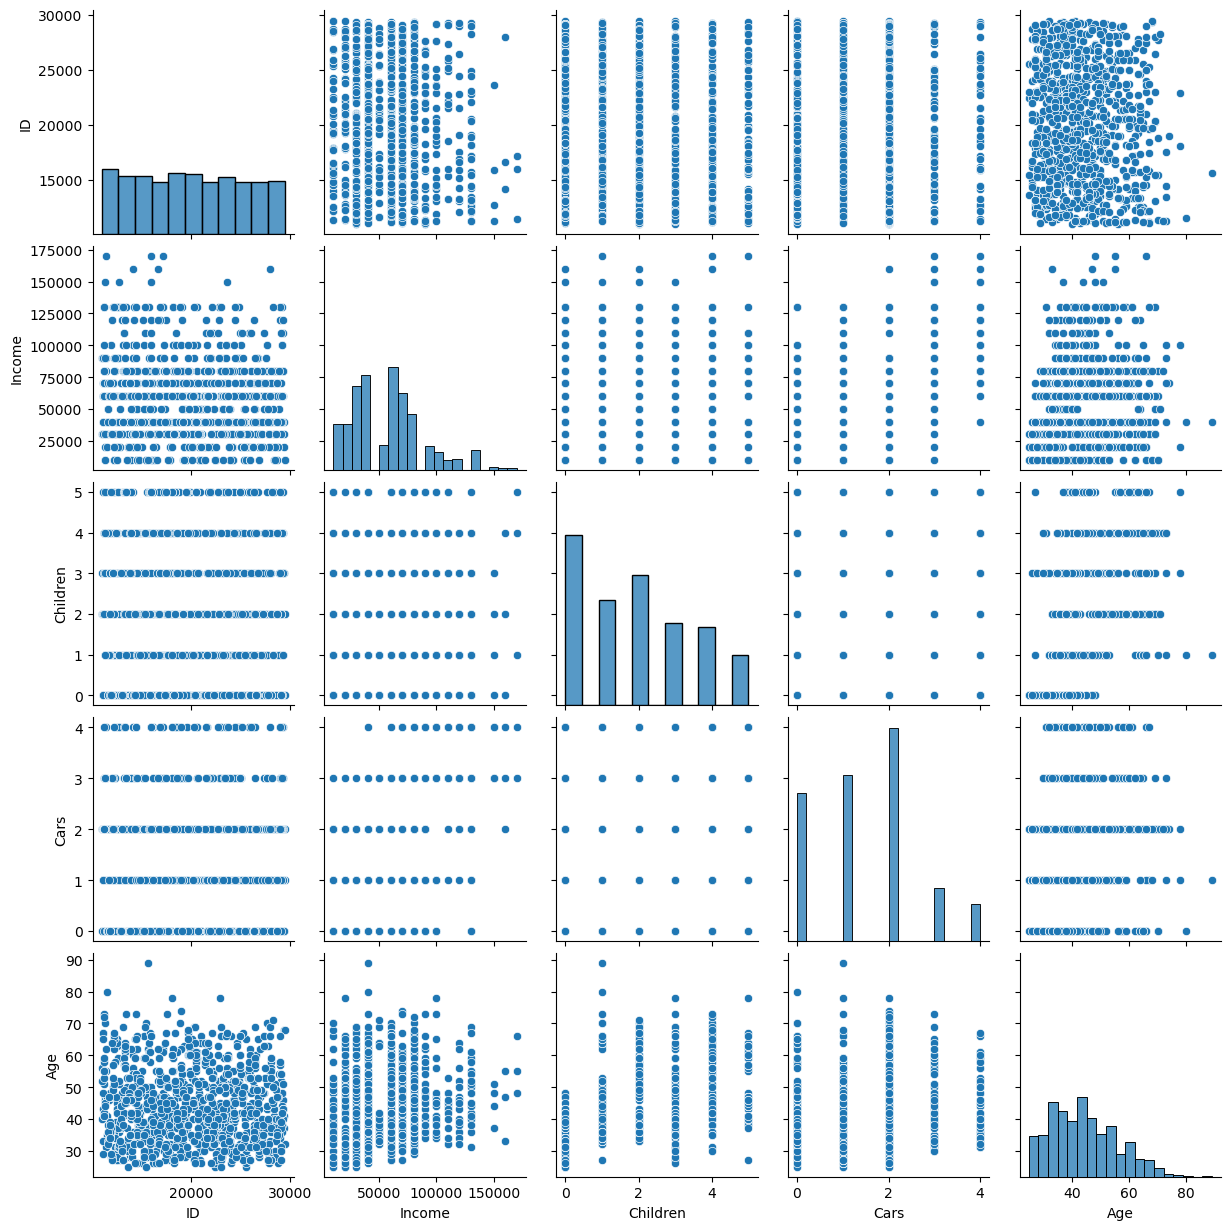

In [31]:
sb.pairplot(dfa)

In [33]:
#Data Wrangling

In [36]:
## Checking For Duplicate Values
dfa.duplicated().sum()


0

In [38]:
## Checing for missing values
dfa.isnull().sum()


ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [42]:
# Drop rows with missing values in the numeric_attribute DataFrame
numeric_attribute_cleaned = numeric_attribute.dropna()
numeric_attribute_cleaned.isnull().sum()

ID          0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

In [44]:
dfb = dfa.copy()

In [46]:
dfb.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [48]:
# Assuming 'numeric_attribute' contains the column names of numeric attributes
numeric_attribute = numeric_attribute_cleaned.columns.tolist()
# Add imputed numeric attributes to dfb
dfb[numeric_attribute] = numeric_attribute_cleaned

In [50]:
dfb.isnull().sum()

ID                  29
Marital Status       7
Gender              11
Income              29
Children            29
Education            0
Occupation           0
Home Owner           4
Cars                29
Commute Distance     0
Region               0
Age                 29
Purchased Bike       0
dtype: int64

In [54]:
for col in ['Marital Status', 'Gender', 'Home Owner']:
    mode_val = dfb[col].mode()[0]
    dfb[col].fillna(mode_val, inplace=True)
# Weighted random sampling for Region
region_counts = dfb['Region'].value_counts(normalize=True)
missing_indices = dfb[dfb['Region'].isnull()].index
imputed_values = np.random.choice(region_counts.index, size=len(missing_indices), p=region_counts.values)
dfb.loc[missing_indices, 'Region'] = imputed_values

In [56]:
dfb.isnull().sum()

ID                  29
Marital Status       0
Gender               0
Income              29
Children            29
Education            0
Occupation           0
Home Owner           0
Cars                29
Commute Distance     0
Region               0
Age                 29
Purchased Bike       0
dtype: int64

In [58]:
dfb = dfb.dropna()

In [60]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                971 non-null    float64
 1   Marital Status    971 non-null    object 
 2   Gender            971 non-null    object 
 3   Income            971 non-null    float64
 4   Children          971 non-null    float64
 5   Education         971 non-null    object 
 6   Occupation        971 non-null    object 
 7   Home Owner        971 non-null    object 
 8   Cars              971 non-null    float64
 9   Commute Distance  971 non-null    object 
 10  Region            971 non-null    object 
 11  Age               971 non-null    float64
 12  Purchased Bike    971 non-null    object 
dtypes: float64(5), object(8)
memory usage: 106.2+ KB


In [62]:
categorical_attribute = dfa.select_dtypes(include = ['object'])

In [64]:
#Outliers

In [66]:
numeric_attribute

['ID', 'Income', 'Children', 'Cars', 'Age']

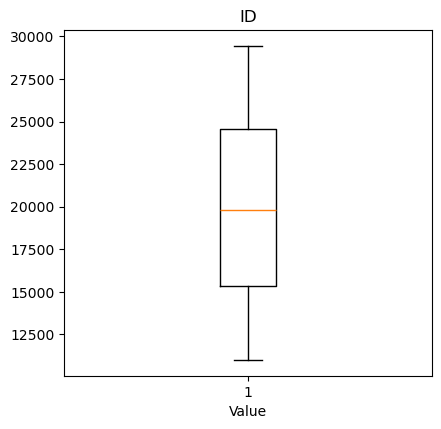

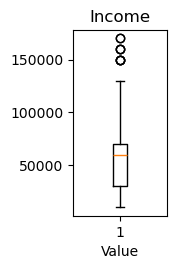

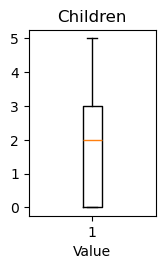

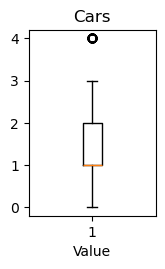

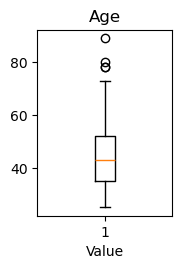

In [70]:
import math
nc = dfb.select_dtypes(include = ['int64', 'float64'])
# Calculate the number of rows and columns for subplots
num_cols = len(nc.columns)
num_rows = math.ceil(num_cols / 4) # Adjust the number of columns per row as needed
plt.figure(figsize=(16, 4 * num_rows))
for i, column in enumerate(nc.columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(nc[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

In [72]:
from scipy import stats
z_scores = stats.zscore(dfb[['Income', 'Age']])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)

In [74]:
rows_with_outliers = dfb[outliers]
print("Rows with outliers:")
rows_with_outliers


Rows with outliers:


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974.0,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
43,17185.0,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
121,15922.0,Married,Male,150000.0,2.0,High School,Professional,Yes,4.0,0-1 Miles,Europe,48.0,No
178,14191.0,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes
259,12705.0,Married,Male,150000.0,0.0,Bachelors,Management,Yes,4.0,0-1 Miles,Pacific,37.0,Yes
321,16675.0,Single,Female,160000.0,0.0,Graduate Degree,Management,No,3.0,0-1 Miles,Pacific,47.0,Yes
356,23608.0,Married,Female,150000.0,3.0,High School,Professional,Yes,3.0,0-1 Miles,Europe,51.0,Yes
375,15628.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,1.0,0-1 Miles,Europe,89.0,No
401,11555.0,Married,Female,40000.0,1.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,80.0,No
829,16009.0,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No


In [76]:
z_scores = stats.zscore(dfb[['Income', 'Age']])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
average_income = dfb['Income'].mean()
average_age = dfb['Age'].mean()
dfb.loc[outliers, 'Income'] = average_income
dfb.loc[outliers, 'Age'] = average_age


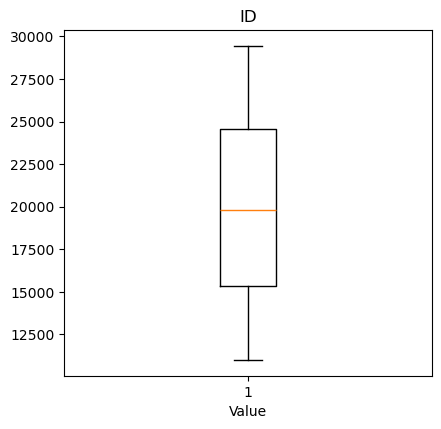

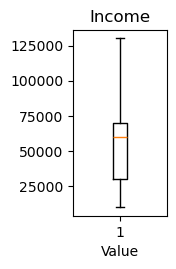

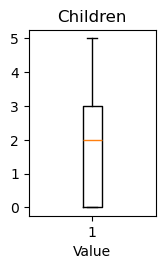

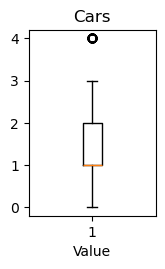

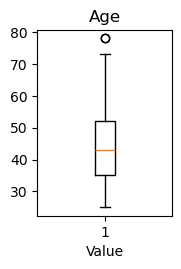

In [80]:
import math
nc = dfb.select_dtypes(include = ['int64', 'float64'])
# Calculate the number of rows and columns for subplots
num_cols = len(nc.columns)
num_rows = math.ceil(num_cols / 4) # Adjust the number of columns per row as needed
# Set the figure size
plt.figure(figsize=(16, 4 * num_rows))
# Iterate through each numerical column
for i, column in enumerate(nc.columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(nc[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

In [82]:
#Exploratory Data Analysis (EDA)

In [84]:
# How many people with what marital status purchased bike

<Figure size 1400x700 with 0 Axes>

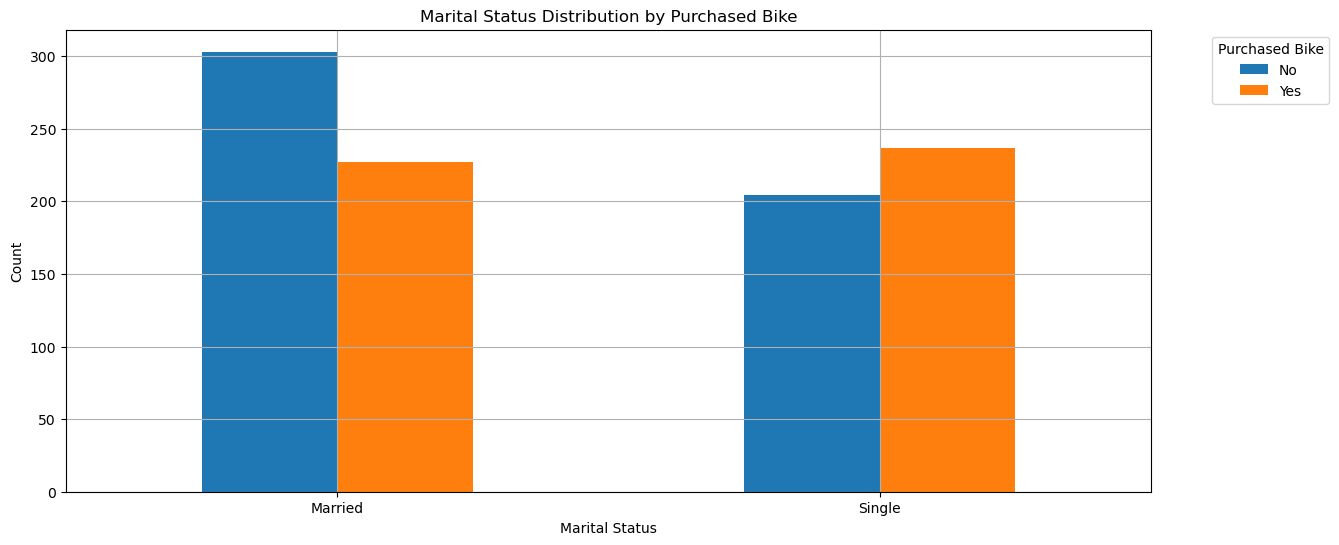

In [86]:
plt.figure(figsize=(14, 7))
# Grouping data by 'Marital Status' and 'Purchased Bike'
grouped_data = dfb.groupby(['Marital Status', 'Purchased Bike']).size().unstack(fill_value=0)
# Plotting grouped bar plot
grouped_data.plot(kind='bar', stacked=False, figsize=(14, 6))
plt.title('Marital Status Distribution by Purchased Bike')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=0)
plt.legend(title='Purchased Bike', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


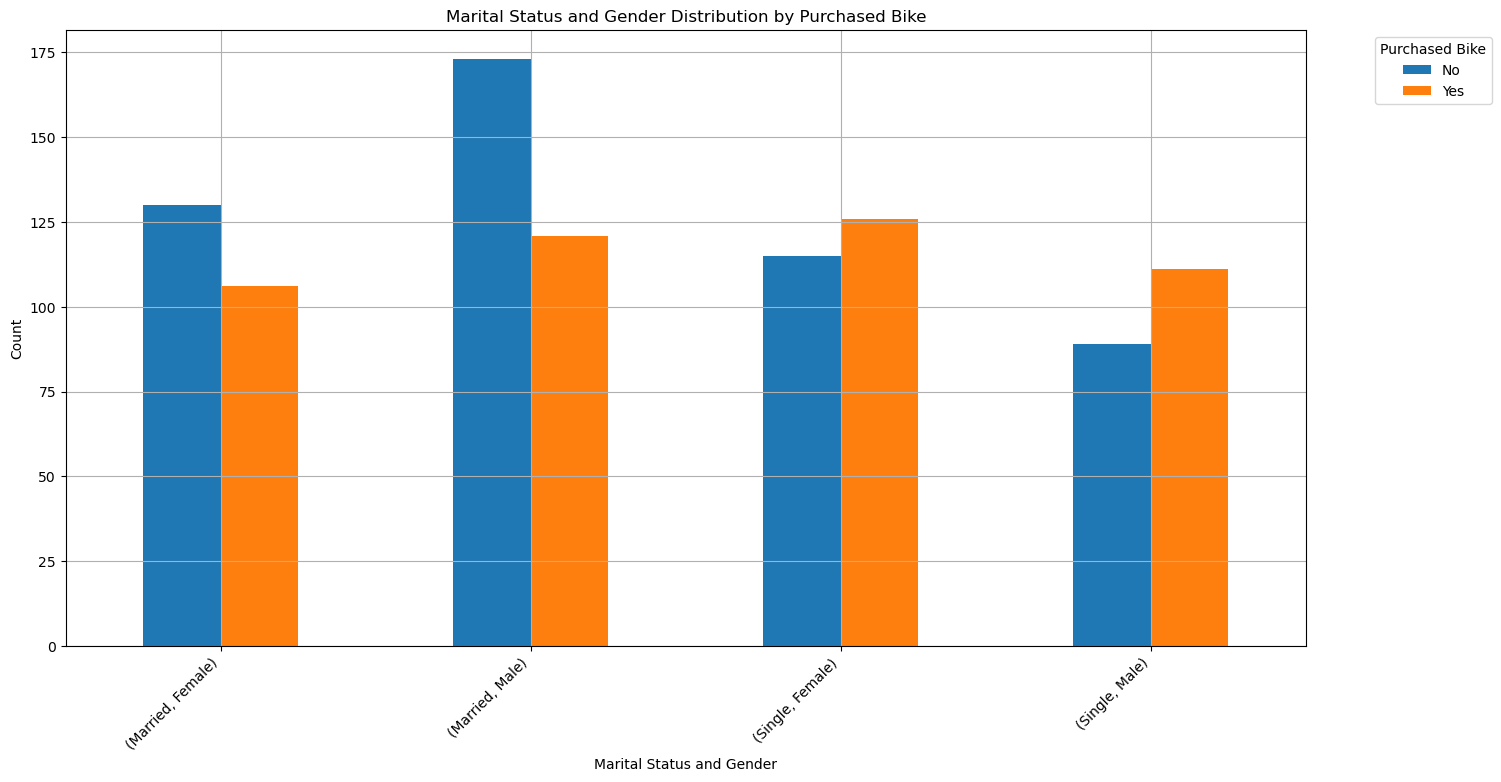

In [88]:
# Grouping data by 'Marital Status', 'Gender', and 'Purchased Bike'
grouped_data = dfb.groupby(['Marital Status', 'Gender', 'Purchased Bike']).size().unstack(fill_value=0)
# Plotting grouped bar plot
grouped_data.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Marital Status and Gender Distribution by Purchased Bike')
plt.xlabel('Marital Status and Gender')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purchased Bike', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


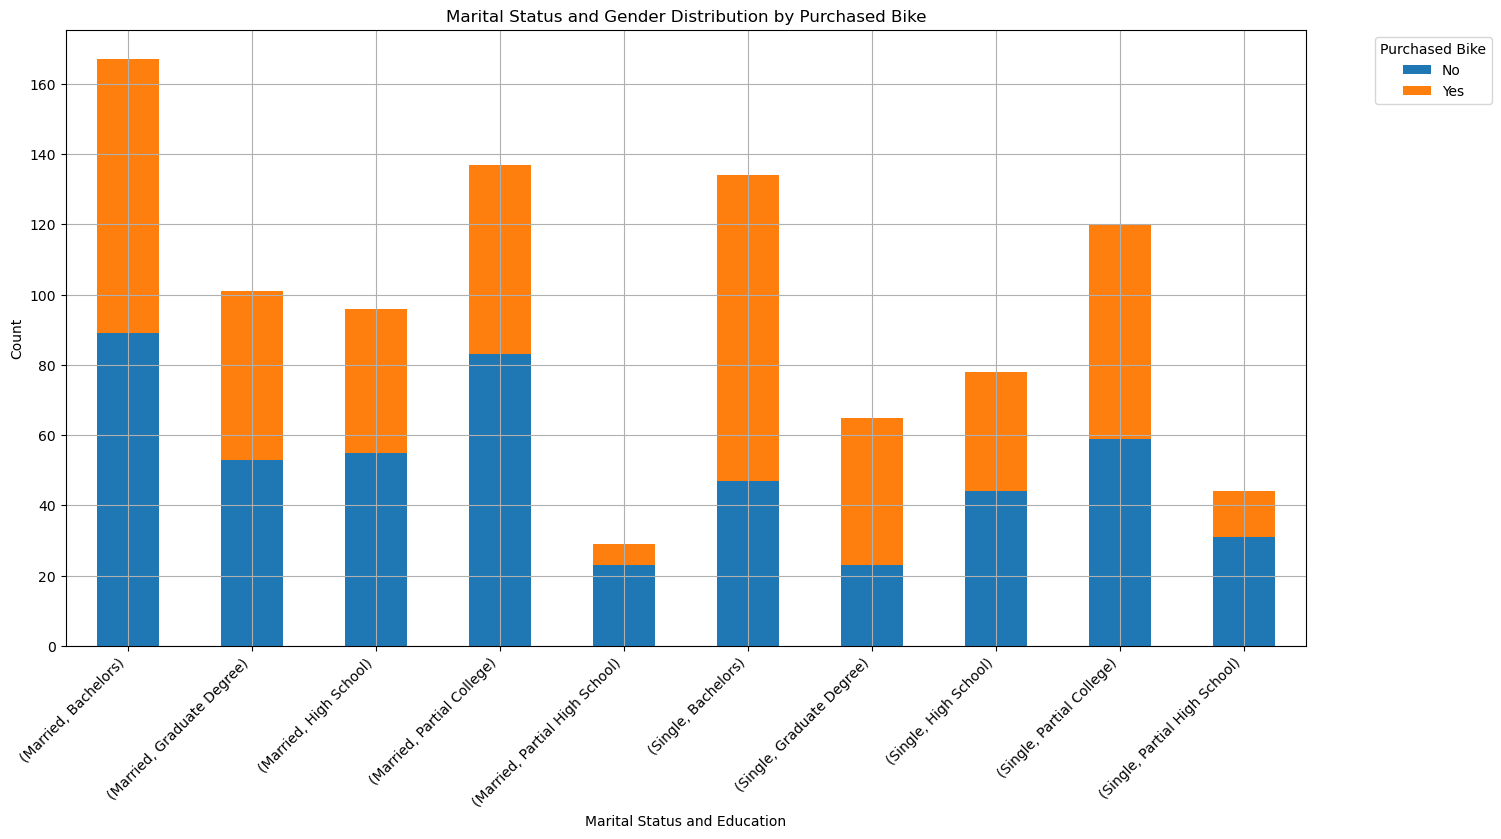

In [90]:
# Stacked Bar Plot
stacked_data = dfb.groupby(['Marital Status', 'Education', 'Purchased Bike']).size().unstack(fill_value=0)
stacked_data.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Marital Status and Gender Distribution by Purchased Bike')
plt.xlabel('Marital Status and Education')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purchased Bike', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


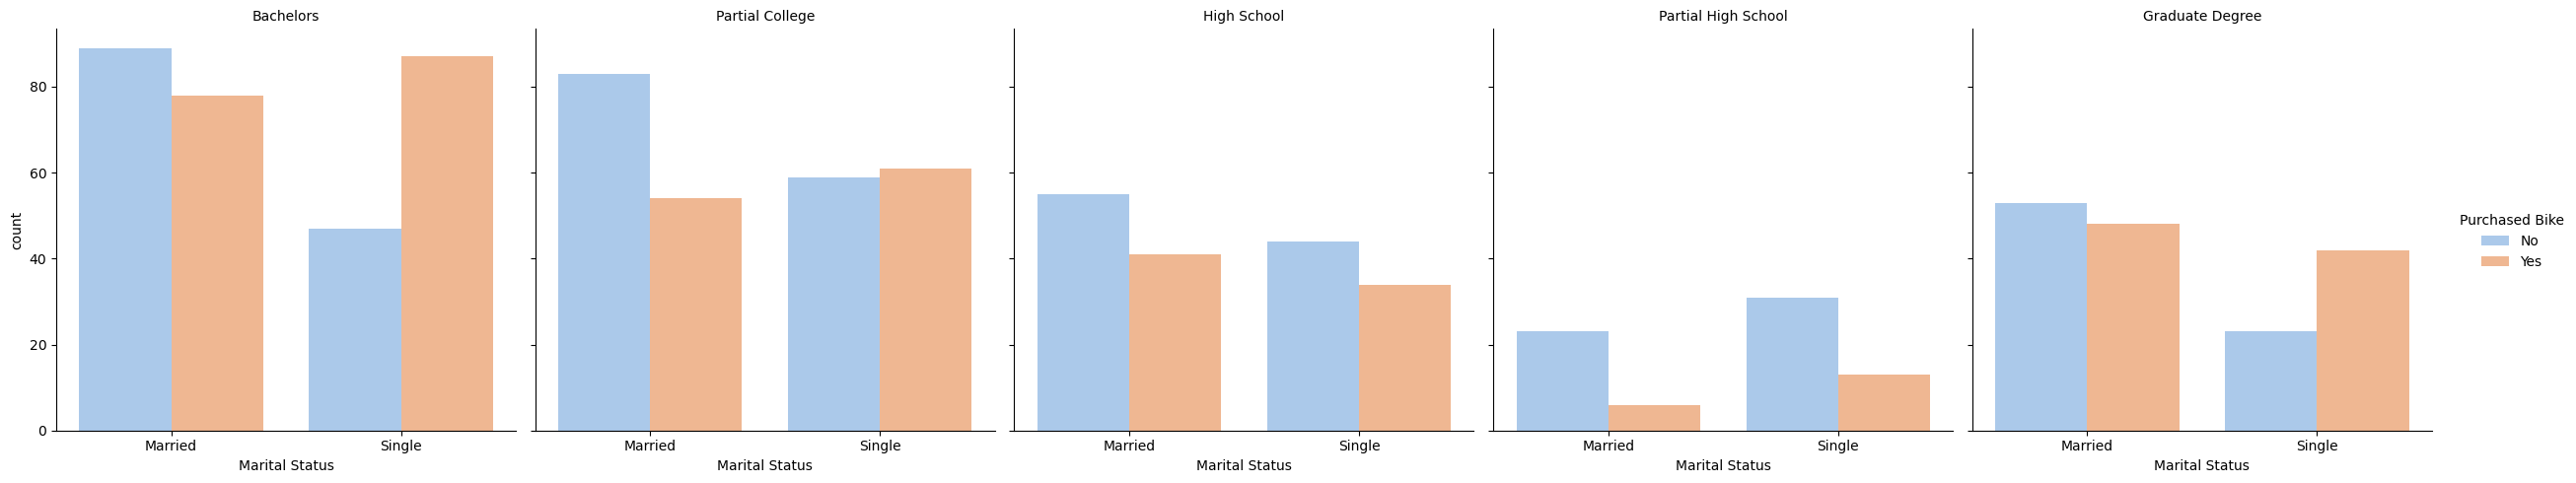

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# Faceted Bar Plot
g = sns.catplot(data=dfb, kind='count', x='Marital Status', col='Education', hue='Purchased Bike', palette='pastel')
g.set_titles('{col_name}')
plt.show()

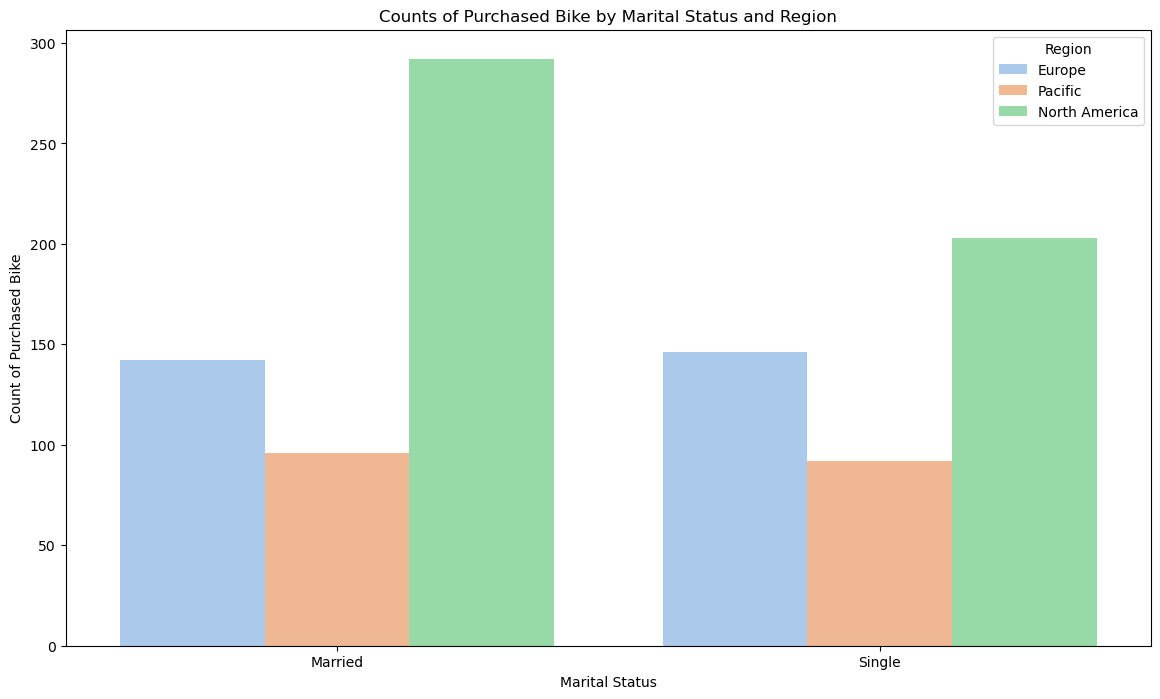

In [96]:
# Create a clustered bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=dfb, x='Marital Status', hue='Region', palette='pastel')
plt.title('Counts of Purchased Bike by Marital Status and Region')
plt.xlabel('Marital Status')
plt.ylabel('Count of Purchased Bike')
plt.legend(title='Region', loc='upper right')
plt.show()

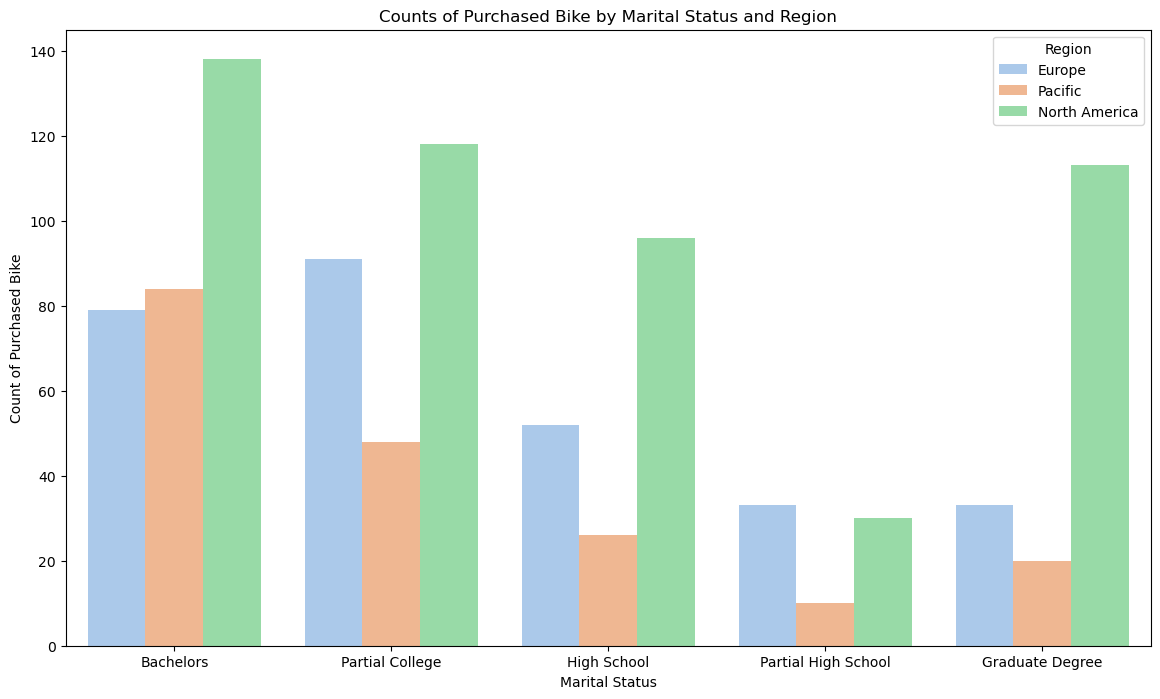

In [100]:
# Create a clustered bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=dfb, x='Education', hue='Region', palette='pastel')
plt.title('Counts of Purchased Bike by Marital Status and Region')
plt.xlabel('Marital Status')
plt.ylabel('Count of Purchased Bike')
plt.legend(title='Region', loc='upper right')
plt.show()


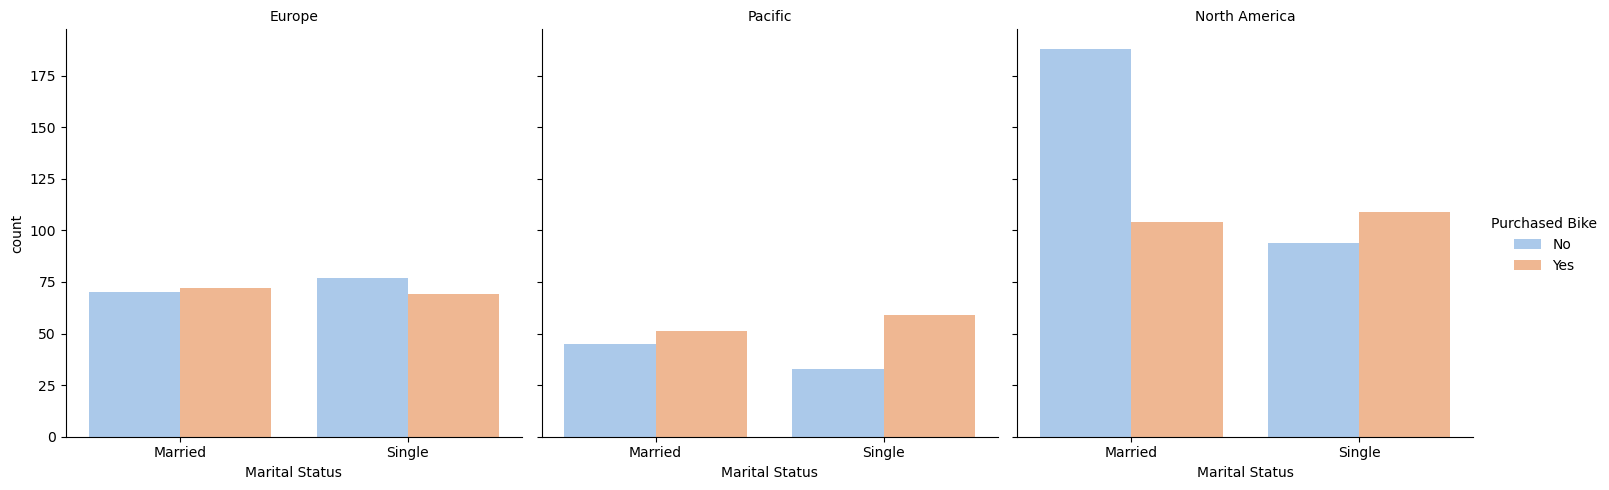

In [102]:
# Faceted Bar Plot
g = sb.catplot(data=dfb, kind='count', x='Marital Status', col='Region', hue='Purchased Bike', palette='pastel')
g.set_titles('{col_name}')
plt.show()

In [104]:
#Feature Engineering

In [106]:
dfb['ID'] = dfb['ID'].astype(int)
dfb['Income'] = dfb['Income'].astype(int)
dfb['Children'] = dfb['Children'].astype(int)
dfb['Cars'] = dfb['Cars'].astype(int)
dfb['Age'] = dfb['Age'].astype(int)

In [108]:
dfc = dfb.copy()

In [110]:
dfc.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [112]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
#Label Encoding

In [116]:
dfc['Gender'] = dfc['Gender'].map({'Male':1, 'Female':0})
dfc['Home Owner'] = dfc['Home Owner'].map({'Yes':1, 'No':0})
dfc['Purchased Bike'] = dfc['Purchased Bike'].map({'Yes':1, 'No':0})
dfc['Marital Status'] = dfc['Marital Status'].map({'Married':1, 'Single':0})

In [118]:
dfc.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1


In [120]:
dfd = dfc.copy()

In [122]:
# Define the custom rank mapping
education_mapping = {
'Partial High School': 0,
'High School': 1,
'Partial College': 2,
'Bachelors': 3,
'Graduate Degree': 4
}
dfd['Education'] = dfd['Education'].map(education_mapping)

In [124]:
dfd.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,3,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,1,30000,3,2,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,1,80000,5,2,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,1,70000,0,3,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,1,30000,0,3,Clerical,0,0,0-1 Miles,Europe,36,1


In [126]:
#Random Sampling

In [128]:
# Random sampling
random_sample = dfd.sample(n=3, random_state=42)

In [130]:
random_sample

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
173,17907,1,0,10000,0,2,Manual,1,1,2-5 Miles,Pacific,27,0
862,22330,1,1,50000,0,4,Skilled Manual,1,0,1-2 Miles,North America,32,1
78,15752,1,1,80000,2,1,Skilled Manual,0,2,1-2 Miles,Pacific,50,1


In [132]:
#Stratified Sampling

In [134]:
# Stratified sampling
stratified_sample, _ = train_test_split(dfd, test_size=0.4,
stratify=dfd['Purchased Bike'], random_state=42)

In [136]:
stratified_sample.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
566,18847,1,0,60000,2,4,Management,1,2,5-10 Miles,North America,70,0
903,14432,0,1,90000,4,4,Management,1,1,5-10 Miles,North America,73,0
813,25899,1,0,70000,2,1,Professional,1,2,10+ Miles,North America,53,0
73,26956,0,0,20000,0,2,Manual,0,1,2-5 Miles,Europe,36,1
782,16112,0,1,70000,4,3,Professional,1,2,2-5 Miles,North America,43,1


In [138]:
# Systematic sampling
k = 2
indices = np.arange(0, len(dfd), k)
systematic_sample = dfd.iloc[indices]

In [140]:
systematic_sample.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,3,Skilled Manual,1,0,0-1 Miles,Europe,42,0
2,14177,1,1,80000,5,2,Professional,0,2,2-5 Miles,Europe,60,0
4,25597,0,1,30000,0,3,Clerical,0,0,0-1 Miles,Europe,36,1
6,27974,0,1,56179,2,1,Management,1,4,0-1 Miles,Pacific,44,1
8,22155,1,1,20000,2,0,Clerical,1,2,5-10 Miles,Pacific,58,0


In [142]:
#Dissimilarity Matrix

In [144]:
#Nominal Attributes: For this example, let's use 'Occupation' and 'Region'.
#Ordinal Attributes: We'll use 'Education' and 'Commute Distance'.
#Binary Attributes: We'll use 'Marital Status' and 'Gender'.
#Numeric Attributes: We'll use 'Income' and 'Age'.


In [148]:
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist, squareform
label_encoders = {}
for column in ['Occupation', 'Region', 'Education', 'Commute Distance']:
    le = LabelEncoder()
    dfd[column] = le.fit_transform(dfd[column])
    label_encoders[column] = le
# Dissimilarity matrix for Nominal attributes: 'Occupation' and 'Region'
nominal_dissimilarity_matrix = squareform(pdist(dfd[['Occupation', 'Region']], metric='euclidean'))
# Dissimilarity matrix for Ordinal attributes: 'Education' and 'Commute Distance'
ordinal_dissimilarity_matrix = squareform(pdist(dfd[['Education', 'Commute Distance']], metric='euclidean'))

In [154]:
import numpy as np
# Dissimilarity matrix for Binary attributes: 'Marital Status' and 'Gender'
binary_dissimilarity_matrix = np.zeros((len(dfd), len(dfd)))
marital_status = dfd['Marital Status'].values
gender = dfd['Gender'].values
for i in range(len(dfd)):
    for j in range(len(dfd)):
        if marital_status[i] == marital_status[j] and gender[i] == gender[j]:
            binary_dissimilarity_matrix[i][j] = 0
        else:
            binary_dissimilarity_matrix[i][j] = 1

In [156]:
# Dissimilarity matrix for Numeric attributes: 'Income' and 'Age'
numeric_dissimilarity_matrix = squareform(pdist(dfd[['Income', 'Age']], metric='euclidean'))

In [160]:
print("Dissimilarity Matrix for Nominal Attributes (Occupation, Region):\n\n", nominal_dissimilarity_matrix)
print("\n\nDissimilarity Matrix for Ordinal Attributes (Education, Commute Distance):\n\n", ordinal_dissimilarity_matrix)
print("\n\nDissimilarity Matrix for Binary Attributes (Marital Status, Gender):\n\n", binary_dissimilarity_matrix)
print("\n\nDissimilarity Matrix for Numeric Attributes (Income, Age):\n", numeric_dissimilarity_matrix)

Dissimilarity Matrix for Nominal Attributes (Occupation, Region):

 [[0.         4.         1.         ... 1.         3.16227766 1.41421356]
 [4.         0.         3.         ... 4.12310563 1.41421356 3.16227766]
 [1.         3.         0.         ... 1.41421356 2.23606798 1.        ]
 ...
 [1.         4.12310563 1.41421356 ... 0.         3.         1.        ]
 [3.16227766 1.41421356 2.23606798 ... 3.         0.         2.        ]
 [1.41421356 3.16227766 1.         ... 1.         2.         0.        ]]


Dissimilarity Matrix for Ordinal Attributes (Education, Commute Distance):

 [[0.         1.         3.16227766 ... 0.         1.         2.82842712]
 [1.         0.         3.         ... 1.         1.41421356 2.23606798]
 [3.16227766 3.         0.         ... 3.16227766 2.23606798 1.41421356]
 ...
 [0.         1.         3.16227766 ... 0.         1.         2.82842712]
 [1.         1.41421356 2.23606798 ... 1.         0.         2.23606798]
 [2.82842712 2.23606798 1.41421356 ... 

In [162]:
#Hunt's Algorithm

In [164]:
df_encoded = dfd.copy()

In [200]:
import numpy as np
class Node:
    def __init__(self, attribute=None, value=None, leaf_class=None):
        self.attribute = attribute # Attribute to split on
        self.value = value # Value of the attribute for splitting
        self.leaf_class = leaf_class # Class label for leaf nodes
        self.children = {} # Dictionary to store child nodes {value: child_node}
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))
    
  # Split dataset based on the given attribute and value
def information_gain(X, y, attribute, value):
    left_indices = X[:, attribute] == value
    right_indices = ~left_indices
# Calculate entropy before splitting
    entropy_before = entropy(y)
# Calculate entropy after splitting
    entropy_left = entropy(y[left_indices])
    entropy_right = entropy(y[right_indices])
# Calculate information gain
    num_left = np.sum(left_indices)
    num_right = np.sum(right_indices)
    total_instances = len(y)
    information_gain = entropy_before - ((num_left / total_instances) * entropy_left + (num_right / total_instances))
    return information_gain
def hunt(X, y, attributes):
    if len(np.unique(y)) == 1: # If all instances have the same class label
        return Node(leaf_class=y[0])
    if len(attributes) == 0: # If there are no more attributes to split on
        return Node(leaf_class=np.argmax(np.bincount(y))) # Return the class with the majority vote
    best_attribute = None
    best_value = None
    best_information_gain = -np.inf
    for attribute in attributes:
        unique_values = np.unique(X[:, attribute])
        for value in unique_values:
            gain = information_gain(X, y, attribute, value)
            if gain > best_information_gain:
                best_information_gain = gain
                best_attribute = attribute
                best_value = value
    if best_information_gain <= 0: # If no attribute provides information gain
        return Node(leaf_class=np.argmax(np.bincount(y))) # Return the class with the majority vote
    node = Node(attribute=best_attribute, value=best_value)
    remaining_attributes = [a for a in attributes if a != best_attribute]
    for value in np.unique(X[:, best_attribute]):
        indices = X[:, best_attribute] == value
        child_node = hunt(X[indices], y[indices], remaining_attributes)
        node.children[value] = child_node
    return node
# Prepare data
X = df_encoded.drop(columns=['ID', 'Purchased Bike']).values
y = df_encoded['Purchased Bike'].values
attributes = list(range(X.shape[1]))
# Build decision tree using Hunt's algorithm
root_node = hunt(X, y, attributes)
# Print decision tree
def print_tree(node, depth=0):
    if node.leaf_class is not None:
        print(depth * ' ', 'Predict:', node.leaf_class)
    else:
        print(depth * ' ', 'Attribute:', node.attribute, 'Value:', node.value)
        for value, child_node in node.children.items():
            print(depth * ' ', ' ', 'Value:', value)
            print_tree(child_node, depth + 1)
print_tree(root_node)

 Attribute: 3 Value: 5
   Value: 0
  Attribute: 7 Value: 0
    Value: 0
   Attribute: 9 Value: 0
     Value: 0
    Predict: 1
     Value: 1
    Attribute: 8 Value: 0
      Value: 0
     Predict: 0
      Value: 1
     Attribute: 0 Value: 1
       Value: 0
      Predict: 0
       Value: 1
      Predict: 1
      Value: 3
     Predict: 0
     Value: 2
    Attribute: 2 Value: 20000
      Value: 20000
     Predict: 1
      Value: 100000
     Predict: 1
      Value: 130000
     Attribute: 0 Value: 0
       Value: 0
      Predict: 1
       Value: 1
      Predict: 0
    Value: 1
   Attribute: 2 Value: 40000
     Value: 10000
    Attribute: 10 Value: 26
      Value: 25
     Attribute: 1 Value: 0
       Value: 0
      Predict: 0
       Value: 1
      Predict: 1
      Value: 26
     Predict: 1
      Value: 27
     Predict: 0
      Value: 28
     Predict: 1
     Value: 20000
    Attribute: 4 Value: 1
      Value: 1
     Predict: 0
      Value: 2
     Predict: 1
     Value: 30000
    Attribute: 5 Va

In [202]:
dfe = dfc.copy()

In [204]:
dfe['Commute Distance'].value_counts()

Commute Distance
0-1 Miles     350
5-10 Miles    187
1-2 Miles     165
2-5 Miles     160
10+ Miles     109
Name: count, dtype: int64

In [206]:
# Remove 'Miles' from 'Commute Distance'
dfe['Commute Distance'] = dfe['Commute Distance'].str.replace(' Miles', '')
dfe['Commute Distance'] = dfe['Commute Distance'].str.replace('10+', '10-10')

In [208]:
# Split 'Commute Distance' into 'minimum_miles' and 'maximum_miles'
dfe[['minimum_miles', 'maximum_miles']] = dfe['Commute Distance'].str.split('-', expand=True)
dfe['minimum_miles'] = dfe['minimum_miles'].astype(int)
dfe['maximum_miles'] = dfe['maximum_miles'].astype(int)


In [210]:
dfe.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,minimum_miles,maximum_miles
0,12496,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1,Europe,42,0,0,1
1,24107,1,1,30000,3,Partial College,Clerical,1,1,0-1,Europe,43,0,0,1
2,14177,1,1,80000,5,Partial College,Professional,0,2,2-5,Europe,60,0,2,5
3,24381,0,1,70000,0,Bachelors,Professional,1,1,5-10,Pacific,41,1,5,10
4,25597,0,1,30000,0,Bachelors,Clerical,0,0,0-1,Europe,36,1,0,1


In [212]:
#Decision Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier
# Prepare data
X = df_encoded.drop(columns=['ID', 'Purchased Bike'])
y = df_encoded['Purchased Bike']
# Initialize and fit Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

DecisionTreeClassifier(random_state=42)

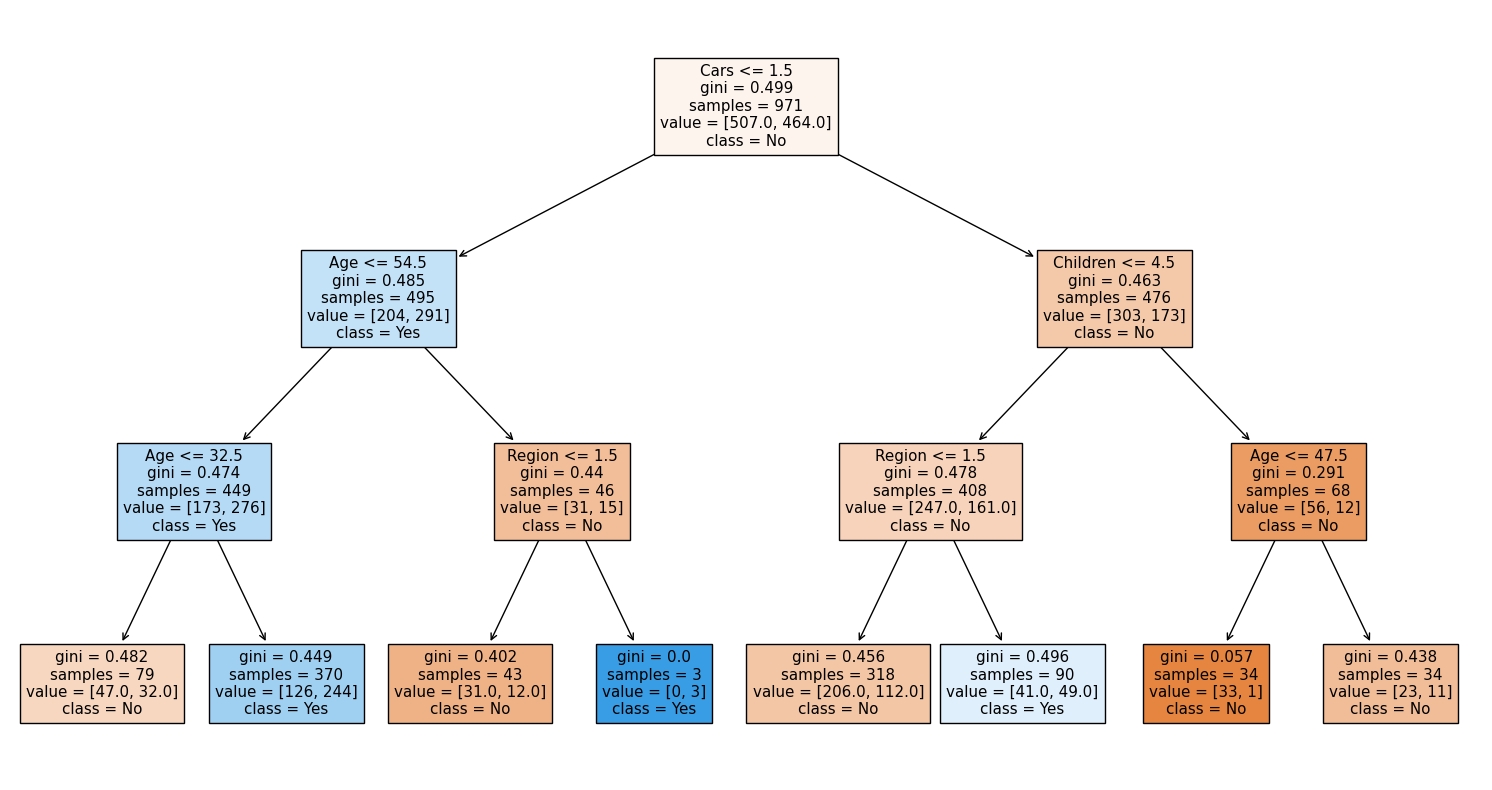

In [216]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Initialize and fit Decision Tree with limited depth
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X, y)
# Plot decision tree with limited depth
plt.figure(figsize=(19, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [218]:
#Classification

In [220]:
from sklearn.metrics import classification_report
# Predict using the decision tree
y_pred = decision_tree.predict(X)
# Classification report
classification_report = classification_report(y, y_pred, target_names=['No', 'Yes'])
print("Classification Report:\n", classification_report)


Classification Report:
               precision    recall  f1-score   support

          No       0.67      0.67      0.67       507
         Yes       0.64      0.64      0.64       464

    accuracy                           0.65       971
   macro avg       0.65      0.65      0.65       971
weighted avg       0.65      0.65      0.65       971

